# Feature extraction from face images
1. Read rectangles from the video's rect file
2. Crop the rectangle from the corresponding frame

#### Imports

In [1]:
from transcriber import Transcriber
from transcriber import overview
import matplotlib.pyplot as plt
import ipywidgets as widgets
import cv2 as cv
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

#### Overview over what videos can be used

In [2]:
print(overview())

folder, 51 total                              duration        fps  rected      speeds
--------------------------------------------  ----------  -------  --------  --------
10 best affordable 2020 style essentials      9m 37s      60       True             3
10 best cheap colognes                        9m 30s      60       True             3
10 best places to meet women                  10m 7s      60       True             3
10 best spring colognes 2020                  8m 53s      60       True             3
10 best valentines gift for men               9m 36s      60       True             3
10 colognes women love                        9m 10s      60       True             3
10 easy mens style upgrades                   9m 55s      60       True             3
10 small things women notice about men        7m 19s      60       True             3
10 things i wish i knew in my 20s             11m 30s     60       True             3
5 influencer tips                             5m 28s  

### Create a transcriber object and look at a sample image

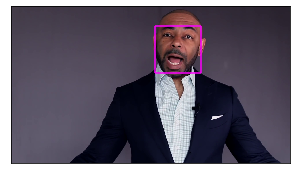

{'frame': 2314, 'success': True, 'x': 990, 'w': 321, 'y': 134, 'h': 321}


In [3]:
t = Transcriber("how i make money on youtube")
rect = t.sample_rect()
print(rect)

In [4]:
t.get_frame(rect["frame"], display=True)

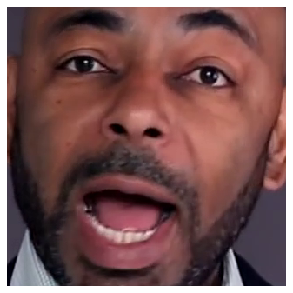

In [5]:
t.get_face_of_frame(rect["frame"], display=True)

In [6]:
t.show_face_with_landmarks(rect["frame"])

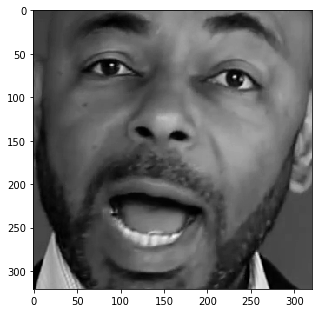

In [7]:
face = t.get_face_of_frame(rect["frame"], color="gray")
plt.imshow(face, cmap="gray")

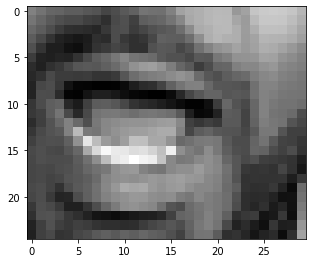

In [8]:
mouth = t.get_mouth_of_frame(rect["frame"])
plt.imshow(mouth, cmap="gray")

#### Animation
https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter

In [9]:
def get_cropped_mouth(face, resize_size=(50, 50), interpolation=cv.INTER_AREA):
    # face = t.get_face_of_frame(i, rgb=True)
    resized_face = cv.resize(face, resize_size, interpolation = interpolation)
    bottom_half = resized_face[resize_size[0]//2:, :]
    sides_removed = bottom_half[:, resize_size[1]//5:-resize_size[1]//5]
    return sides_removed

In [10]:
plt.rcParams['animation.embed_limit'] = 2**128
plt.rc('image', cmap='gray')

In [11]:
out_widget = widgets.Output()
out_widget

Output()

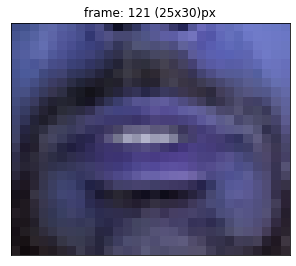

In [12]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

def get_cropped_mouth(face, resize_size=(50, 50), interpolation=cv.INTER_AREA):
    # face = t.get_face_of_frame(i, rgb=True)
    resized_face = cv.resize(face, resize_size, interpolation = interpolation)
    bottom_half = resized_face[resize_size[0]//2:, :]
    sides_removed = bottom_half[:, resize_size[1]//5:-resize_size[1]//5]
    return sides_removed

frame_range = (120, 240)
plt.rcParams['animation.embed_limit'] = 2**128
plt.rc('image', cmap='gray')

face_rect_size = 50
face_resize = (face_rect_size, face_rect_size)

fig, ax = plt.subplots()
first_face = t.get_face_of_frame(frame_range[0])

l = ax.imshow(get_cropped_mouth(first_face, face_resize))

def animate(i):
    face = t.get_face_of_frame(i)
    mouth = get_cropped_mouth(face, face_resize)
    
    l.set_data(mouth)
    ax.set_title("frame: {} ({}x{})px".format(i, *mouth.shape))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    with out_widget:
        out_widget.clear_output(wait=True)
        print("Frame: {} / {}".format(i-frame_range[0], frame_range[1]-frame_range[0]))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=range(frame_range[0]+1, frame_range[1]))

from IPython.display import HTML
HTML(ani.to_jshtml())

In [13]:
for frame in range(*frame_range):
    print(frame)
    face0 = t.get_face_of_frame(frame)
    face1 = t.get_face_of_frame(frame+1)
    mouth0 = get_cropped_mouth(face0)
    mouth1 = get_cropped_mouth(face1)
    
    if (mouth0 == mouth1).all():
        print(mouth0)
        print(mouth1)
        break
        

120
121
122
[[[ 63  78 137]
  [ 69  84 144]
  [ 81  93 155]
  ...
  [106 120 197]
  [104 118 195]
  [100 114 191]]

 [[ 72  87 146]
  [ 78  93 155]
  [ 88 101 165]
  ...
  [110 121 199]
  [108 120 198]
  [106 118 196]]

 [[ 77  90 154]
  [ 84  96 161]
  [ 96 108 174]
  ...
  [111 121 198]
  [108 119 195]
  [106 118 192]]

 ...

 [[ 26  22  28]
  [ 36  34  40]
  [ 43  40  53]
  ...
  [ 52  44  70]
  [ 47  40  54]
  [ 39  31  43]]

 [[ 17  11  16]
  [ 39  34  39]
  [ 41  36  44]
  ...
  [ 40  34  50]
  [ 39  30  41]
  [ 50  40  53]]

 [[ 22  16  19]
  [ 23  16  20]
  [ 35  27  31]
  ...
  [ 26  19  27]
  [ 47  38  47]
  [ 58  46  58]]]
[[[ 63  78 137]
  [ 69  84 144]
  [ 81  93 155]
  ...
  [106 120 197]
  [104 118 195]
  [100 114 191]]

 [[ 72  87 146]
  [ 78  93 155]
  [ 88 101 165]
  ...
  [110 121 199]
  [108 120 198]
  [106 118 196]]

 [[ 77  90 154]
  [ 84  96 161]
  [ 96 108 174]
  ...
  [111 121 198]
  [108 119 195]
  [106 118 192]]

 ...

 [[ 26  22  28]
  [ 36  34  40]
  [ 43  

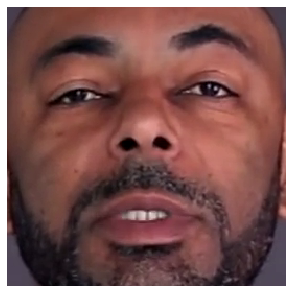

In [14]:
t.get_face_of_frame(frame_range[0], display=True)

http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

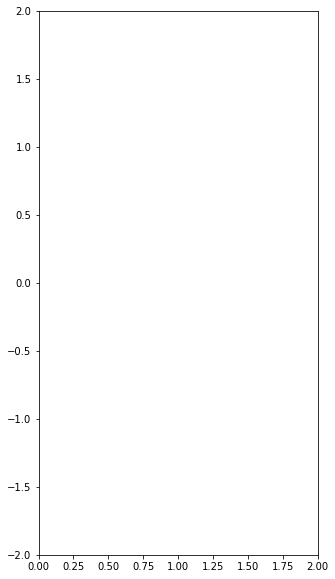

In [16]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [17]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [18]:
out_widget = widgets.Output()

# animation function. This is called sequentially
def animate(i):
    with out_widget:
        out_widget.clear_output(wait=True)
        print("Frame:", i)
        
    face = t.get_face_of_frame(rect["frame"])
        
    
    
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [19]:
out_widget

Output()

In [20]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)

In [21]:


HTML(anim.to_html5_video())




In [22]:
frame_range = (200, 320)

In [ ]:
for frame in range(*frame_range):
    t.get_face_of_frame(frame)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_jshtml())